<a href="https://colab.research.google.com/github/min02yam/wether/blob/main/hospital_Eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

07.12<BR>
hospital EDA

# 1. 패키지 및 데이터 로드

In [1]:
system("gdown --id 1fW-c6QeKD39JKGJYc_M9JI0wiNBkbQFC")

In [21]:
df= read.csv("hospital.csv")

In [105]:
require(dplyr)

In [1]:
install.packages(c("DataExplorer","skimr","pacman"))
pacman::p_load("DataExplorer","skimr")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘htmlwidgets’, ‘igraph’, ‘reshape2’, ‘gridExtra’, ‘networkD3’




In [6]:
str(df)

'data.frame':	49674 obs. of  4 variables:
 $ back_hospital.yyyymmdd : int  20120101 20120101 20120101 20120101 20120101 20120101 20120101 20120101 20120101 20120101 ...
 $ back_hospital.area     : chr  "강원" "강원" "경기" "경기" ...
 $ back_hospital.sex      : int  1 2 1 2 1 2 1 2 1 2 ...
 $ back_hospital.frequency: int  3 3 4 5 2 1 6 1 0 2 ...


In [7]:
glimpse(df)

Rows: 49,674
Columns: 4
$ back_hospital.yyyymmdd  <int> 20120101, 20120101, 20120101, 20120101, 201201…
$ back_hospital.area      <chr> "강원", "강원", "경기", "경기", "경남", "경남"…
$ back_hospital.sex       <int> 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2…
$ back_hospital.frequency <int> 3, 3, 4, 5, 2, 1, 6, 1, 0, 2, 1, 0, 4, 1, 3, 6…


In [ ]:
skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             49674 
Number of columns          4     
_______________________          
Column type frequency:           
  character                1     
  numeric                  3     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 back_hospital.area         0             1   2   2     0       17          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable           n_missing complete_rate        mean        sd       p0
1 back_hospital.yyyymmdd          0             1 20135658.   11189.    20120101
2 back_hospital.sex               0             1        1.5      0.500        1
3 back_hospital.frequency         0             1     

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


In [ ]:
duplicated(df) %>% sum # 중복없음

[1] 0

1. 4개의 변수는 총 49674(약5만개)의 관측치를 가지고 있음
2. 그 중 타겟(`frequency`)를 제외한 3개 변수는 모두 범주형임.
3. `yyyymmdd` 날짜,`area` 지역(도단위), `sex` 성별
4. `sex`의 mean과 Median을 봤을때 매우 밸런스함
5. 타겟은 min=0, max=13, mean=1.42, Median=1.5 -> 회귀 모델시 로그변환 필요
6. 중복 없음 

### 검증 데이터셋에 맞춰 변수명 변경

In [22]:
require(stringr)

In [23]:
"back_hospital." %>% nchar ->nchar

In [24]:
names(df)= str_sub(names(df),nchar+1)

In [25]:
df %>% head # 확인

,yyyymmdd,area,sex,frequency
,<int>,<chr>,<int>,<int>
1,20120101,강원,1,3
2,20120101,강원,2,3
3,20120101,경기,1,4
4,20120101,경기,2,5
5,20120101,경남,1,2
6,20120101,경남,2,1


In [26]:
write.csv(df, "hospital_rename.csv", row.names=FALSE) 

# 1. BASIC EDA

In [ ]:
introduce(df) %>% str

'data.frame':	1 obs. of  9 variables:
 $ rows                : int 49674
 $ columns             : int 4
 $ discrete_columns    : int 1
 $ continuous_columns  : int 3
 $ all_missing_columns : int 0
 $ total_missing_values: int 0
 $ complete_rows       : int 49674
 $ total_observations  : int 198696
 $ memory_usage        : num 996168
 - attr(*, ".internal.selfref")=<externalptr> 


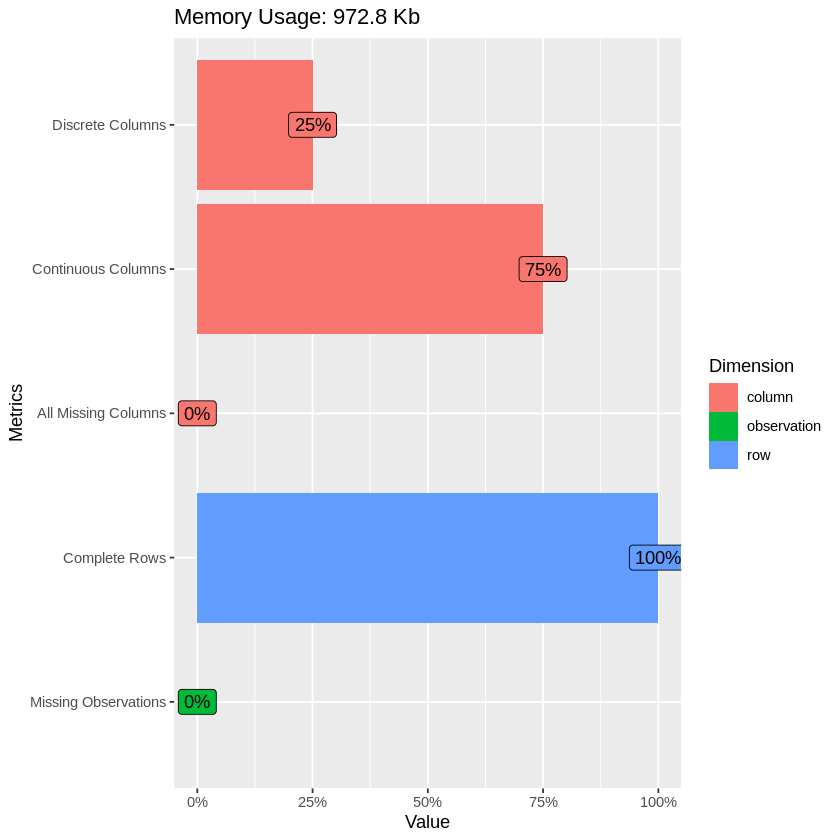

In [ ]:
plot_intro(df) # 미씽 없음 

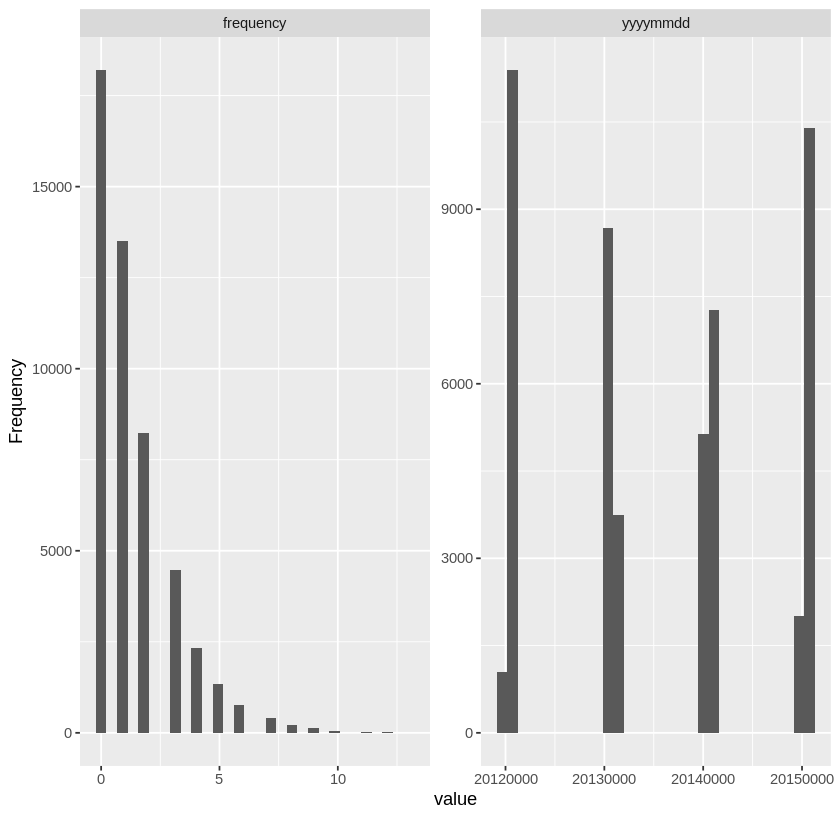

In [ ]:
plot_histogram(df)

앞서 확인한 것과 마찬가지로 0의 빈도가 가장 많음

In [ ]:
#df%>% mutate(frequency=as.factor(frequency)) -> df_target_factor
#df%>% mutate(frequency=as.character(frequency)) -> df_target_char

In [ ]:
#head(df_target_factor)

,yyyymmdd,area,sex,frequency
,<int>,<chr>,<int>,<fct>
1,20120101,강원,1,3
2,20120101,강원,2,3
3,20120101,경기,1,4
4,20120101,경기,2,5
5,20120101,경남,1,2
6,20120101,경남,2,1


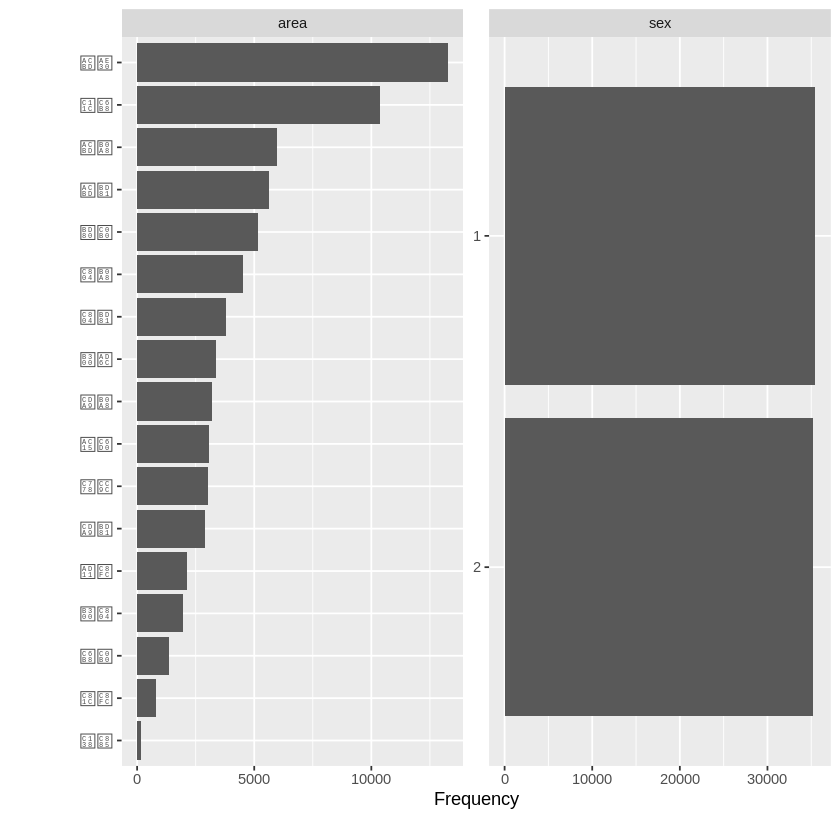

In [ ]:
plot_bar(df, with='frequency')

In [ ]:
table(df$ sex)
table(df$ area)


    1     2 
24837 24837 


강원 경기 경남 경북 광주 대구 대전 부산 서울 세종 울산 인천 전남 전북 제주 충남 
2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 
충북 
2922 

In [ ]:
table(df$frequency)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
18197 13513  8231  4467  2321  1347   756   395   222   132    58    20    10 
   13 
    5 

In [10]:
df %>% group_by(area) %>% 
       summarise(sum_freq=sum(frequency)) %>%
       arrange(-sum_freq)

area,sum_freq
<chr>,<int>
경기,13267
서울,10354
경남,5979
경북,5614
부산,5146
전남,4532
전북,3808
대구,3363
충남,3194


비율을 알아야함. 이거만 봐선 모르겠음

성별은 상관 없어 보임

# 지역별, 성별별 차이

In [11]:
df %>% group_by(area) %>% 
       mutate(area_freq= sum(frequency)) -> df_area

In [12]:
df %>% group_by(area, sex) %>% 
       mutate(area_sex_freq= sum(frequency))  -> df_area_sex

In [13]:
require(data.table)

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [48]:
inner_join(df_area, df_area_sex) %>%
  mutate(prop=area_sex_freq/area_freq *100)  %>% head

Joining, by = c("yyyymmdd", "area", "sex", "frequency")


yyyymmdd,area,sex,frequency,area_freq,area_sex_freq,prop
<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>
20120101,강원,1,3,3069,1637,53.33985
20120101,강원,2,3,3069,1432,46.66015
20120101,경기,1,4,13267,6760,50.95349
20120101,경기,2,5,13267,6507,49.04651
20120101,경남,1,2,5979,2906,48.60345
20120101,경남,2,1,5979,3073,51.39655


In [80]:
inner_join(df_area, df_area_sex) %>%
  mutate(prop=area_sex_freq/area_freq *100) %>% 
  ungroup %>%
  as.data.table() ->DT

Joining, by = c("yyyymmdd", "area", "sex", "frequency")


In [81]:
#DT[ , diff  :=abs( prop - shift(prop) ) , by = area]

In [102]:
#DT %>% head # 확인
DT[ , .(diff=abs( prop - shift(prop) )%>%round(3) ), by = area] %>% 
  arrange(-diff)%>%
  distinct() %>%
  na.omit()

area,diff
<chr>,<dbl>
세종,14.110
전북,10.242
광주,10.169
전남,7.679
부산,7.268
강원,6.680
대전,3.860
제주,3.648
인천,3.292


1. 주어진 기간 내, 지역별로 성별 별 차이가 많은 지역 top3. 세종(14.11), 전북(10.242), 광주(10.169)  
  - 비교적 연도 별 feq이 적은 편인 지역임,  세종-전북-광주 경도로 내려기는게 이어지는 위치임. 
  - Q. 세종을 감싸는 충북 충남 대전은 왜?? 
  - 기후 파악이 필수적 
2. 주어진 기간 내, 지역별로 성별 별 차이가 없는 지역 top3. 울산(0.29), 대구(1.1), 경북(1.14)
  - 역시 경도상 이어짐
3. 걸론
- 처음부터 성비가 다른가?
- raw data의 sampling된 성비 비율은 같았음.
- 지역별 특성에는 성별도 포함될 수 있다고 생각함. 성별 데이터 추가로 포함
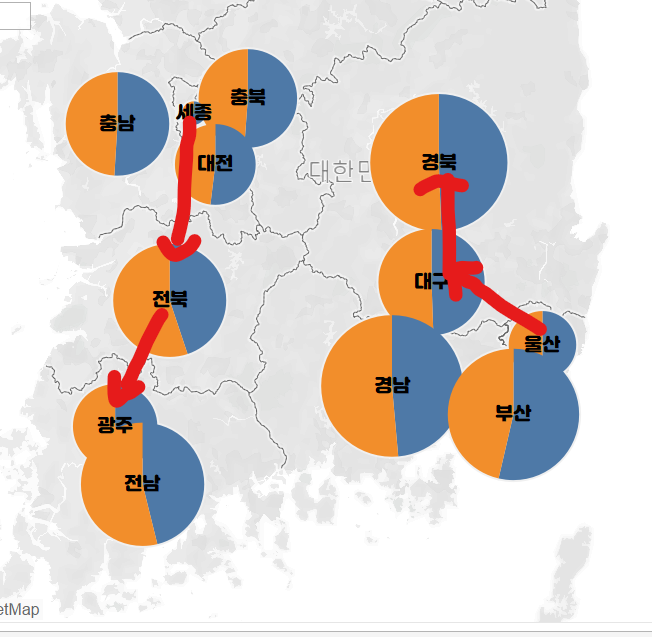



이상 태블로로 확인함

In [ ]:
시간에 따라서 빈도 어떻게 발생하는지
지역에 따라서 빈도 어떻게 발생하는지


# 날짜 파싱

In [16]:
#require(lubridate)
#require(ggplot2)
#install.packages("ggridges")
#library(ggridges)
require(dplyr)
require(magrittr)

In [10]:
ymd(df$yyyymmdd)

[1] "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-01"
    [6] "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-01"
   [11] "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-01"
   [16] "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-01"
   [21] "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-01"
   [26] "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-01"
   [31] "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-02"
   [36] "2012-01-02" "2012-01-02" "2012-01-02" "2012-01-02" "2012-01-02"
   [41] "2012-01-02" "2012-01-02" "2012-01-02" "2012-01-02" "2012-01-02"
   [46] "2012-01-02" "2012-01-02" "2012-01-02" "2012-01-02" "2012-01-02"
   [51] "2012-01-02" "2012-01-02" "2012-01-02" "2012-01-02" "2012-01-02"
   [56] "2012-01-02" "2012-01-02" "2012-01-02" "2012-01-02" "2012-01-02"
   [61] "2012-01-02" "2012-01-02" "2012-01-02" "2012-01-02" "2012-01-02"
   [66] "2012-01-02" "2012-01-02" "2012-01-02" "2012-01-03" "2012-01-03"
   [71] "2012-01-03" "2012-01-03" "2012-01-03" "2012-01-03" "2012-01-03"
   [76] "2012-01-03" "2012-01-03" "2012-01-03" "2012-01-03" "2012-01-03"
   [81] "2012-01-03" "2012-01-03" "2012-01-03" "2012-01-03" "2012-01-03"
   [86] "2012-01-03" "2012-01-03" "2012-01-03" "2012-01-03" "2012-01-03"
   [91] "2012-01-03" "2012-01-03" "2012-01-03" "2012-01-03" "2012-01-03"
   [96] "2012-01-03" "2012-01-03" "2012-01-03" "2012-01-03" "2012-01-03"
  [101] "2012-01-03" "2012-01-03" "2012-01-04" "2012-01-04" "2012-01-04"
  [106] "2012-01-04" "2012-01-04" "2012-01-04" "2012-01-04" "2012-01-04"
  [111] "2012-01-04" "2012-01-04" "2012-01-04" "2012-01-04" "2012-01-04"
  [116] "2012-01-04" "2012-01-04" "2012-01-04" "2012-01-04" "2012-01-04"
  [121] "2012-01-04" "2012-01-04" "2012-01-04" "2012-01-04" "2012-01-04"
  [126] "2012-01-04" "2012-01-04" "2012-01-04" "2012-01-04" "2012-01-04"
  [131] "2012-01-04" "2012-01-04" "2012-01-04" "2012-01-04" "2012-01-04"
  [136] "2012-01-04" "2012-01-05" "2012-01-05" "2012-01-05" "2012-01-05"
  [141] "2012-01-05" "2012-01-05" "2012-01-05" "2012-01-05" "2012-01-05"
  [146] "2012-01-05" "2012-01-05" "2012-01-05" "2012-01-05" "2012-01-05"
  [151] "2012-01-05" "2012-01-05" "2012-01-05" "2012-01-05" "2012-01-05"
  [156] "2012-01-05" "2012-01-05" "2012-01-05" "2012-01-05" "2012-01-05"
  [161] "2012-01-05" "2012-01-05" "2012-01-05" "2012-01-05" "2012-01-05"
  [166] "2012-01-05" "2012-01-05" "2012-01-05" "2012-01-05" "2012-01-05"
  [171] "2012-01-06" "2012-01-06" "2012-01-06" "2012-01-06" "2012-01-06"
  [176] "2012-01-06" "2012-01-06" "2012-01-06" "2012-01-06" "2012-01-06"
  [181] "2012-01-06" "2012-01-06" "2012-01-06" "2012-01-06" "2012-01-06"
  [186] "2012-01-06" "2012-01-06" "2012-01-06" "2012-01-06" "2012-01-06"
  [191] "2012-01-06" "2012-01-06" "2012-01-06" "2012-01-06" "2012-01-06"
  [196] "2012-01-06" "2012-01-06" "2012-01-06" "2012-01-06" "2012-01-06"
  [201] "2012-01-06" "2012-01-06" "2012-01-06" "2012-01-06" "2012-01-07"
  [206] "2012-01-07" "2012-01-07" "2012-01-07" "2012-01-07" "2012-01-07"
  [211] "2012-01-07" "2012-01-07" "2012-01-07" "2012-01-07" "2012-01-07"
  [216] "2012-01-07" "2012-01-07" "2012-01-07" "2012-01-07" "2012-01-07"
  [221] "2012-01-07" "2012-01-07" "2012-01-07" "2012-01-07" "2012-01-07"
  [226] "2012-01-07" "2012-01-07" "2012-01-07" "2012-01-07" "2012-01-07"
  [231] "2012-01-07" "2012-01-07" "2012-01-07" "2012-01-07" "2012-01-07"
  [236] "2012-01-07" "2012-01-07" "2012-01-07" "2012-01-08" "2012-01-08"
  [241] "2012-01-08" "2012-01-08" "2012-01-08" "2012-01-08" "2012-01-08"
  [246] "2012-01-08" "2012-01-08" "2012-01-08" "2012-01-08" "2012-01-08"
  [251] "2012-01-08" "2012-01-08" "2012-01-08" "2012-01-08" "2012-01-08"
  [256] "2012-01-08" "2012-01-08" "2012-01-08" "2012-01-08" "2012-01-08"
  [261] "2012-01-08" "2012-01-08" "2012-01-08" "2012-01-08" "2012-01-08"
  [266] "2012-01-08" "2012-01-08" "2012-01-08" "2012-01-08" "2012-01-08"
  [271] "2012-01-08" "2012-01-08" "2012-01-09" "2012-01-09" "2

In [20]:
df %>% colnames

[1] "" "" "" ""

In [27]:
#df %>% mutate(yyyymmdd=parse_date_time(yyyymmdd, orders="ymd")) %>%
#  head()
df %<>% mutate(yyyymmdd=parse_date_time(yyyymmdd, orders="ymd"))

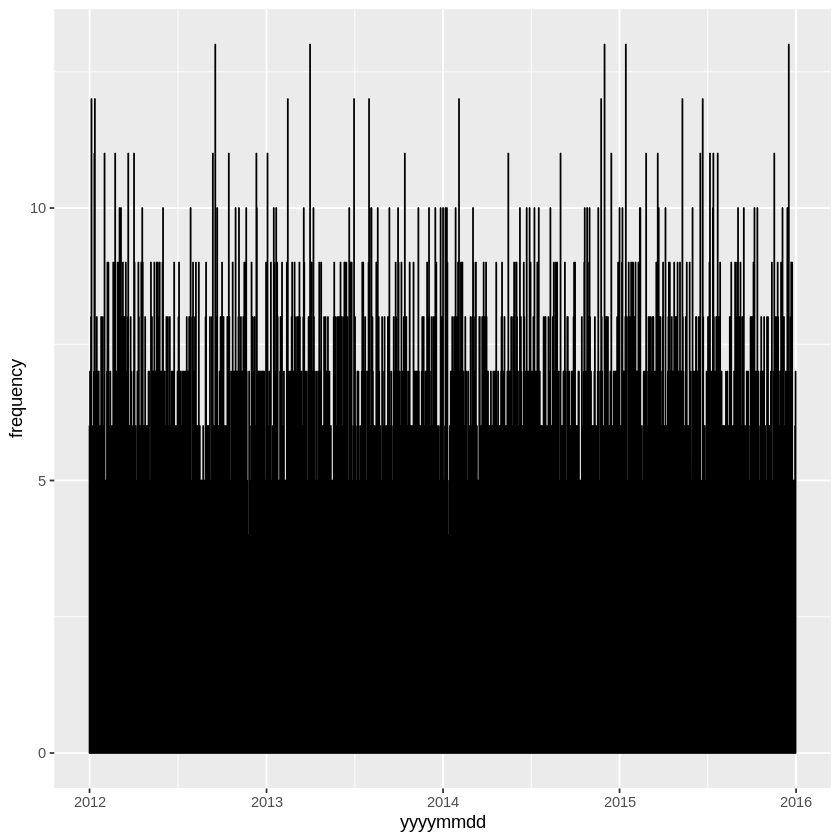

In [16]:
ggplot(df, aes(x = yyyymmdd, y = frequency)) +
  geom_line()

무슨 요일에 많이 발생했는지 궁금 

In [51]:
df %>% mutate( year=year(yyyymmdd),
               month=month(yyyymmdd),
               day=day(yyyymmdd),
               yday=yday(yyyymmdd),
               wday=wday(df$yyyymmdd, label=TRUE) ) ->df_date

In [32]:
df_date$ year %>% table
df_date$ month %>% table
df_date$ day %>% table

.
 2012  2013  2014  2015 
12444 12410 12410 12410 

.
   1    2    3    4    5    6    7    8    9   10   11   12 
4216 3842 4216 4080 4216 4080 4216 4216 4080 4216 4080 4216 

.
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1530 1496  952 

In [35]:
wday(df$yyyymmdd) %>% table

.
   1    2    3    4    5    6    7 
7106 7106 7106 7106 7106 7072 7072 

In [45]:
xtabs(frequency~wday, df_date) %>% prop.table()*100

wday
     Sun      Mon      Tue      Wed      Thu      Fri      Sat 
11.30299 17.50018 15.60762 15.40236 14.63939 13.91181 11.63564 

In [48]:
xtabs(frequency~wday+area, data=df_date) %>% prop.table()*100 

     area
wday        강원       경기       경남       경북       광주       대구
  Sun 0.51525232 2.18840682 0.93566424 0.87196546 0.33689575 0.52940760
  Mon 0.74881450 3.22457357 1.62361101 1.37306250 0.53223866 0.86347229
  Tue 0.68086913 2.86078279 1.25415811 1.24141836 0.48552622 0.69077783
  Wed 0.67096044 2.94996107 1.30653266 1.26689787 0.44447590 0.66954491
  Thu 0.64264987 2.73621629 1.20744568 1.17913511 0.42890509 0.68653125
  Fri 0.60159955 2.62722061 1.14091585 1.06872390 0.40201005 0.70351759
  Sat 0.48411069 2.19265341 0.99511643 0.94557294 0.37653054 0.61717036
     area
wday        대전       부산       서울       세종       울산       인천
  Sun 0.34963550 0.68370019 1.71278930 0.02264845 0.19817397 0.51949890
  Mon 0.47986411 1.30653266 2.54228891 0.04812796 0.32415599 0.72475051
  Tue 0.42324298 1.18621275 2.35685470 0.04105032 0.30433859 0.63274117
  Wed 0.40484111 1.12676056 2.23936584 0.02123293 0.31283176 0.65397410
  Thu 0.39493241 1.07155496 2.18416024 0.03114162 0.27178144 0.63415

1. 모든 지역에서 월요일이 가장 높음 

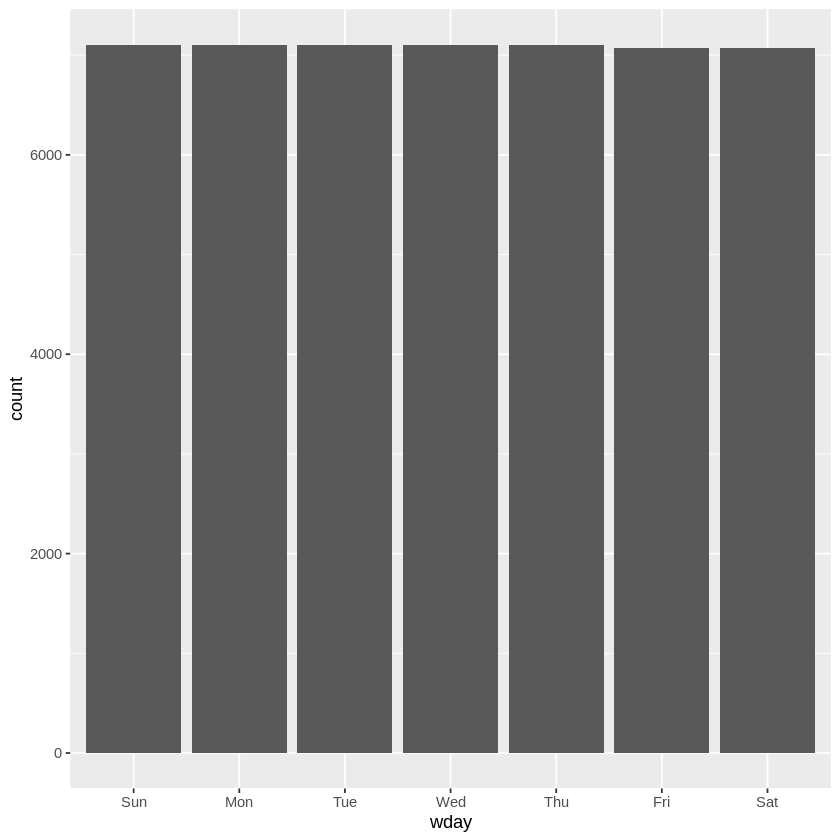

In [41]:
ggplot(df_date, aes(wday)) +
  geom_bar()

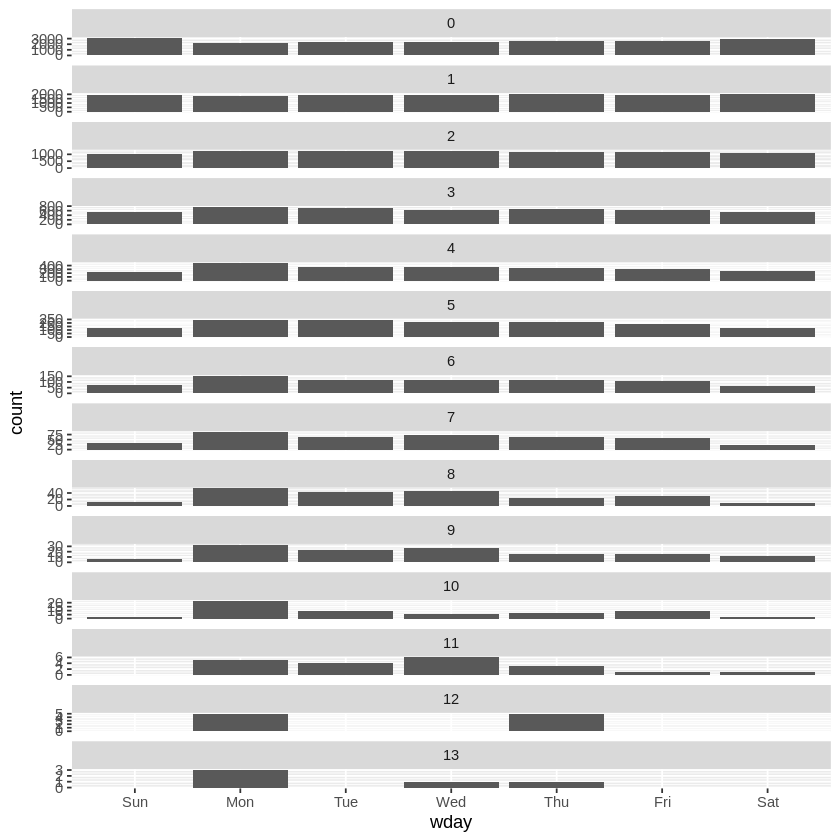

In [38]:
ggplot(df_date, aes(wday)) +
  geom_bar() +
  facet_wrap(~ frequency, ncol = 1, scale = "free_y")

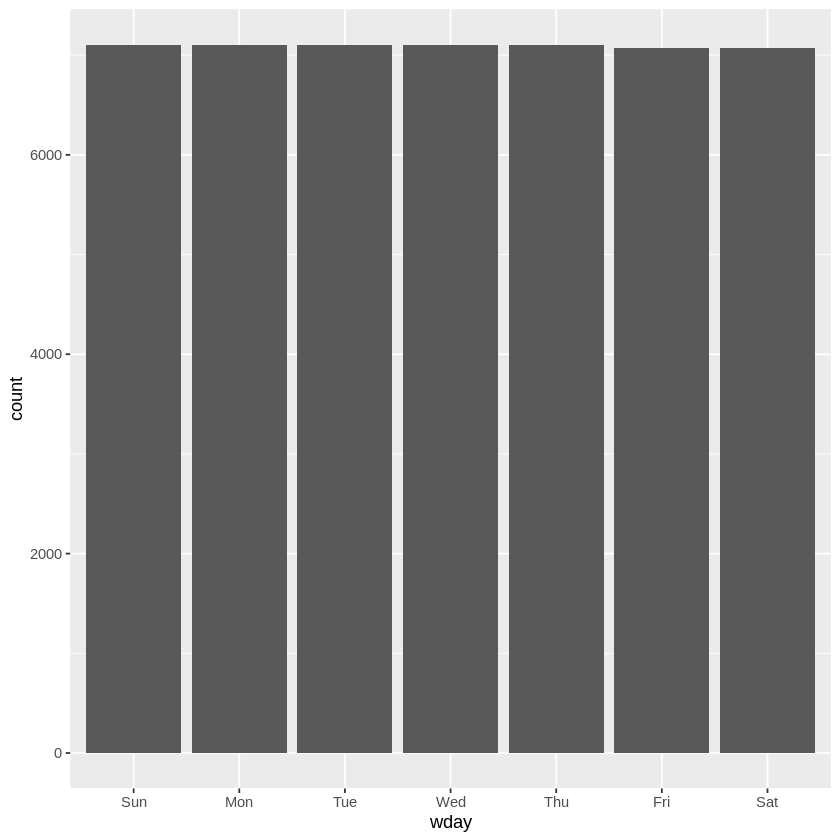

In [39]:
ggplot(df_date, aes(wday)) +
  geom_bar() 

## month 기준

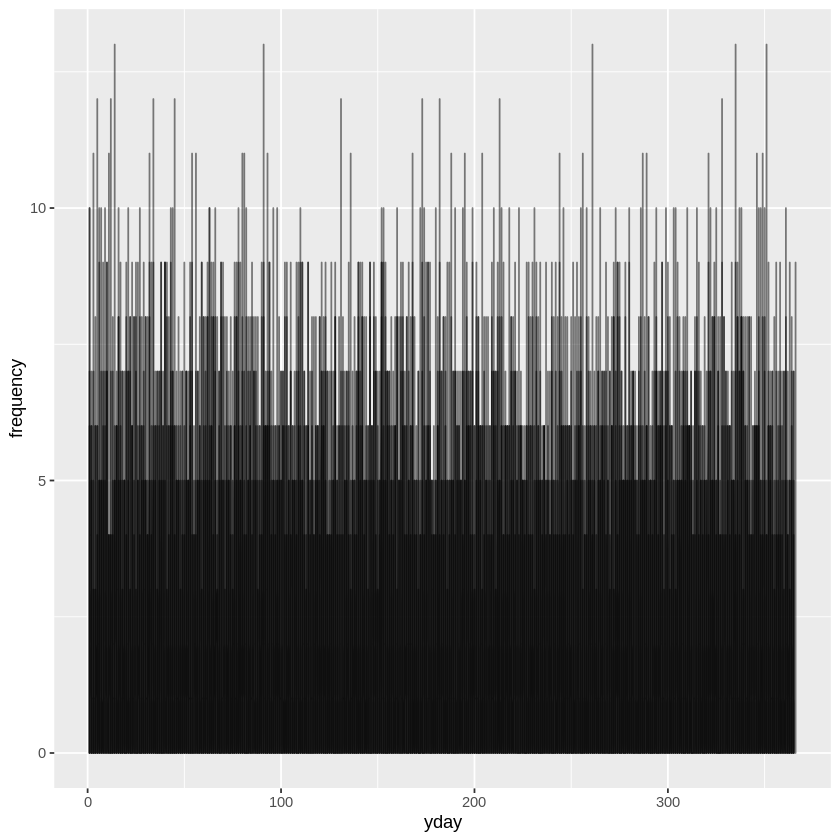

In [53]:
ggplot(df_date, aes(x = yday, y = frequency)) +
  geom_line(aes(group = year), alpha = 0.5)

  ### 이거 에스키스로 해보기 ####

In [57]:
df_date %>% mutate(month=month(yyyymmdd, label=TRUE)) -> df_date_month

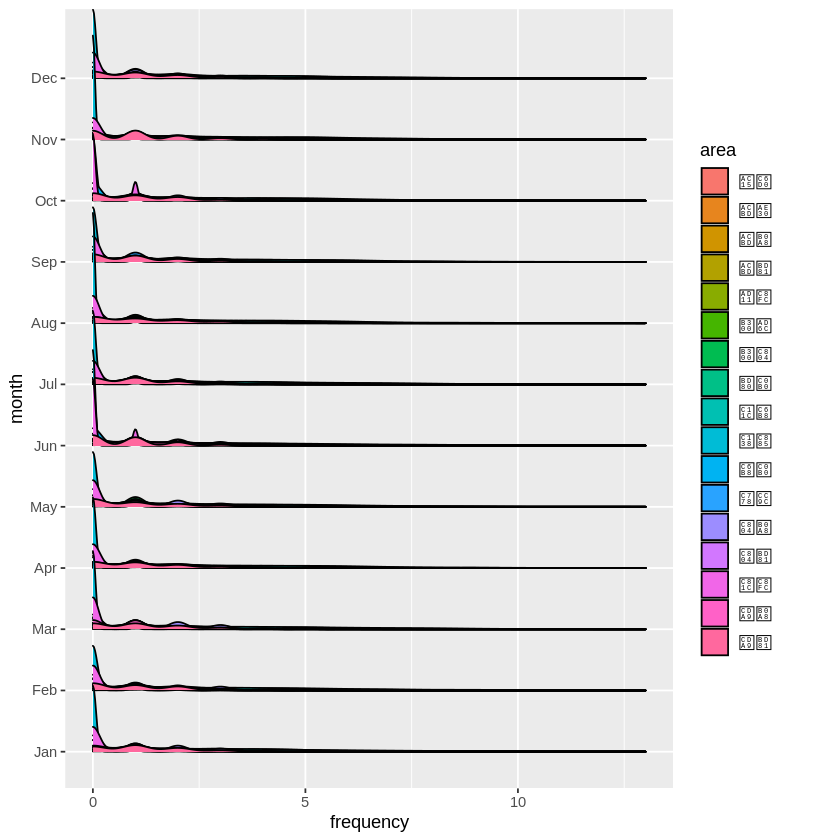

In [65]:
ggplot(df_date_month, aes(x = frequency, y = month, height = ..density.., fill=area)) +
  geom_density_ridges(stat = "density")

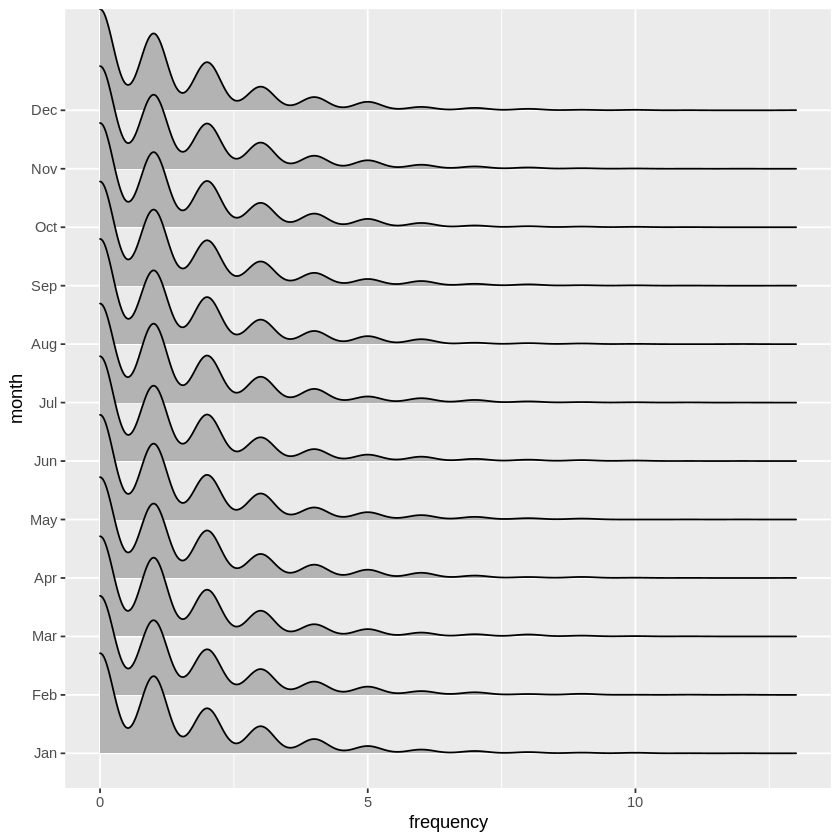

In [66]:
ggplot(df_date_month, aes(x = frequency, y = month, height = ..density..)) +
  geom_density_ridges(stat = "density")

간단한 시계열 그래프로 확인 해봐야 할 것 같음 . 

In [68]:
xtabs(frequency~year, df_date)

year
 2012  2013  2014  2015 
17373 17479 17623 18170 

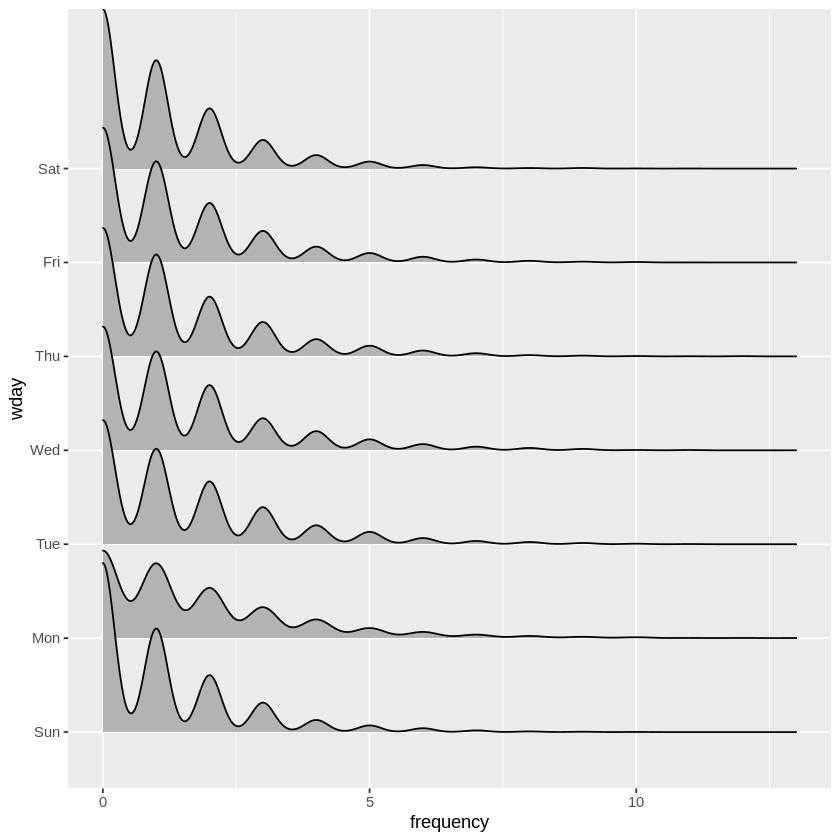

In [69]:
ggplot(df_date_month, aes(x = frequency, y = wday, height = ..density..)) +
  geom_density_ridges(stat = "density")

In [ ]:
###############에스키스
getwd()
setwd("C:/Users/alsdu/Downloads")
df=read.csv("hospital_rename.csv")
library(dplyr)

install.packages("esquisse")
library(esquisse)


esquisser()


End(Not run)